In [149]:
##SIMPLE LINEAR REGRESSION

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
time_data = pd.read_csv(r"C:\Users\91863\Downloads\delivery_time.csv")
time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [151]:
### x = sorting time  
###Y = delivery time

time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [152]:
time_data.columns = ["Delivery_Time","Sorting_Time"]
time_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


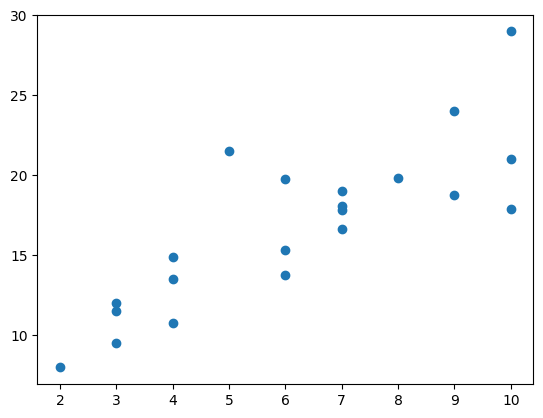

In [153]:
plt.scatter(time_data["Sorting_Time"],time_data["Delivery_Time"])

In [154]:
time_data.corr()   ### correlation = 0.8  high positive correlation 

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\91863\AppData\Local\Temp\ipykernel_3360\2498628839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_data["Sorting_Time"])


<Axes: xlabel='Sorting_Time', ylabel='Density'>

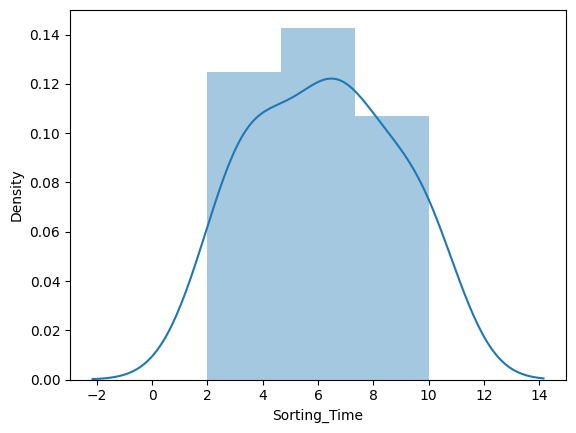

In [155]:
sns.distplot(time_data["Sorting_Time"])

C:\Users\91863\AppData\Local\Temp\ipykernel_3360\3488644696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_data["Delivery_Time"])


<Axes: xlabel='Delivery_Time', ylabel='Density'>

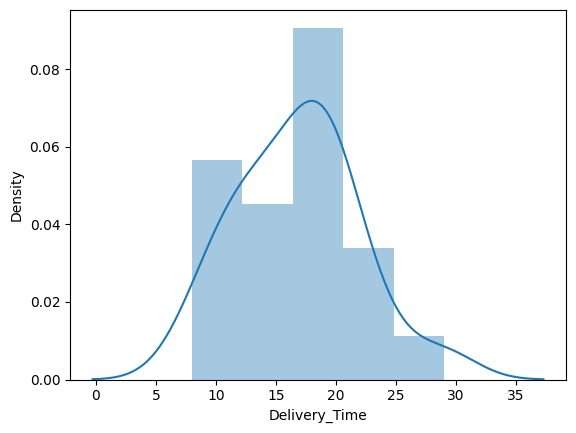

In [156]:
sns.distplot(time_data["Delivery_Time"])

<Axes: >

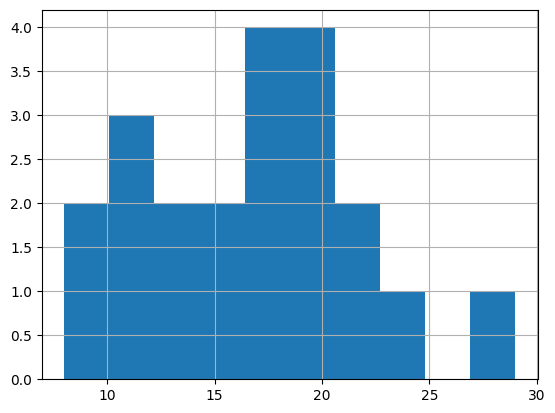

In [157]:
time_data["Delivery_Time"].hist()

<Axes: >

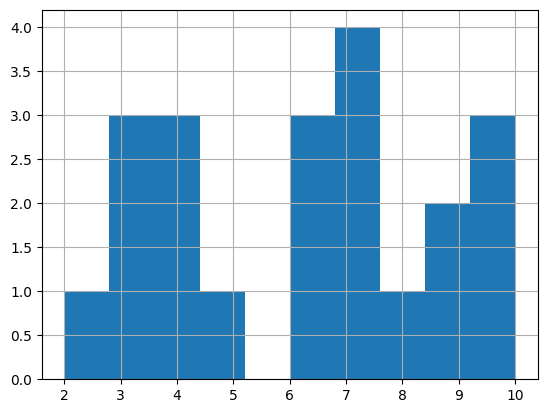

In [158]:
time_data["Sorting_Time"].hist()

C:\Users\91863\AppData\Local\Temp\ipykernel_3360\3439250108.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  square_root["Delivery_Time"] = np.sqrt(square_root.Delivery_Time)


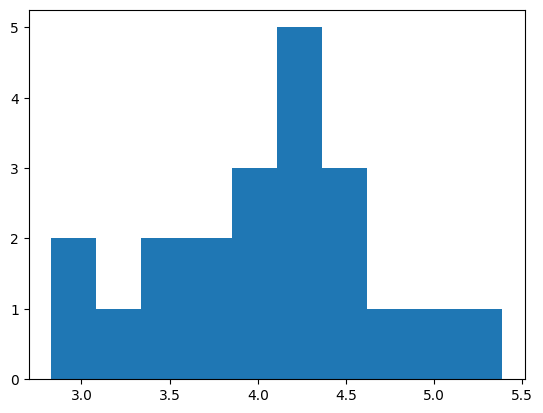

In [159]:
#  square root tranformations


from math import sqrt
square_root= pd.DataFrame()
square_root = time_data[['Delivery_Time']]
square_root["Delivery_Time"] = np.sqrt(square_root.Delivery_Time)


# Histogram

plt.hist(square_root["Delivery_Time"])
plt.show()

C:\Users\91863\AppData\Local\Temp\ipykernel_3360\2513060202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log['Delivery_Time'] = np.log(log.Delivery_Time)


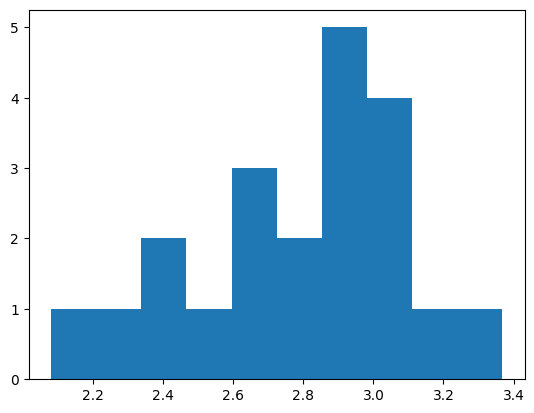

In [160]:
# log transform

log = pd.DataFrame()
log = time_data[['Delivery_Time']]
log['Delivery_Time'] = np.log(log.Delivery_Time)



# Histogram
plt.hist(log['Delivery_Time'])
plt.show()

fitting model

In [161]:
import statsmodels.formula.api as smf
model= smf.ols("Delivery_Time~Sorting_Time",data=time_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        22:29:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
model.rsquared

0.6822714748417231

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

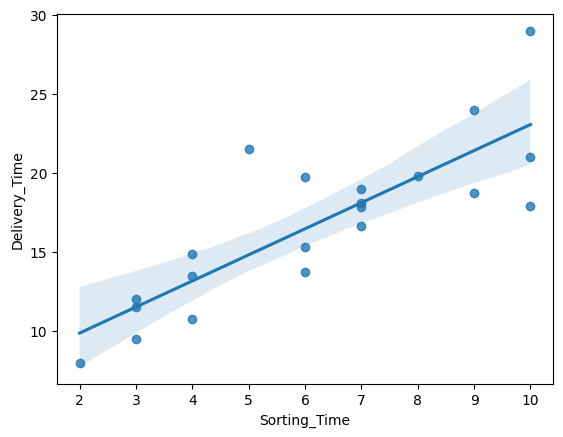

In [163]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=time_data)

In [164]:
model.params    ## Bo = 6.58     ## B1 = 1.64

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [165]:
model.tvalues,model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [166]:
model.rsquared  

0.6822714748417231

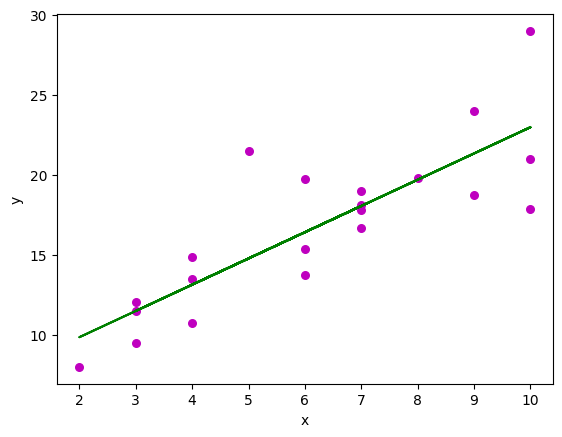

In [167]:
x=time_data["Sorting_Time"].values
y=time_data["Delivery_Time"].values
plt.scatter(x,y,color="m",marker="o",s=30)
b0=  6.58 
b1=  1.64
# predicted response vector
y_hat=b0+b1*x
#plotting the regression line
plt.plot(x,y_hat,color="g")
#putting labels
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [168]:
pred = model.predict(time_data["Sorting_Time"])
time_data["predicted_delivery_data"] = pred

In [169]:
time_data.head()

,Delivery_Time,Sorting_Time,predicted_delivery_data
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


predicting new data

In [170]:
df1 = pd.DataFrame({"Sorting_Time":[6,3,7,8]})

In [171]:
df1

,Sorting_Time
0,6
1,3
2,7
3,8


In [172]:
model.predict(df1)

0    16.476853
1    11.529794
2    18.125873
3    19.774893
dtype: float64

In [173]:
time_data

,Delivery_Time,Sorting_Time,predicted_delivery_data
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [174]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
mse = mean_squared_error(time_data["Delivery_Time"],time_data["predicted_delivery_data"])
mse

7.793311548584062

In [175]:
mean_absolute_percentage_error(time_data["Delivery_Time"],time_data["predicted_delivery_data"])

0.12379726239852056

In [176]:
import math
rmse =math.sqrt(mse)
rmse

2.7916503270617654

----

---

2)   Salary_hike -> Build a prediction model for Salary_hike


In [177]:
salary_data=pd.read_csv(r"C:\Users\91863\Downloads\Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [178]:
### X= years experience
### Y = salary

In [179]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


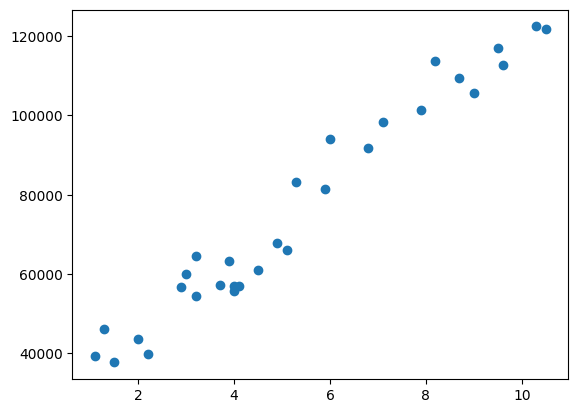

In [180]:
plt.scatter(salary_data["YearsExperience"],salary_data["Salary"])

In [181]:
salary_data.corr() # high positive correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\91863\AppData\Local\Temp\ipykernel_3360\3604328746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

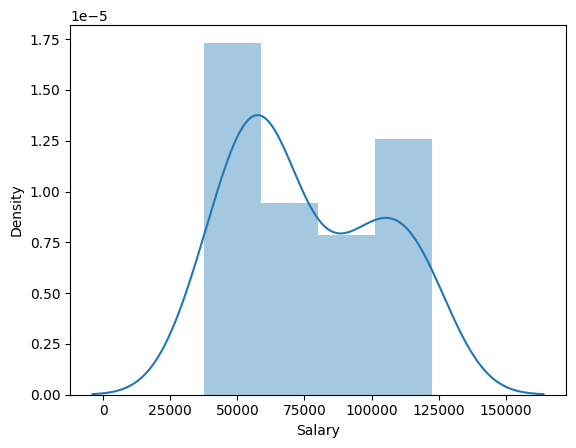

In [182]:
sns.distplot(salary_data["Salary"])

C:\Users\91863\AppData\Local\Temp\ipykernel_3360\2105413875.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

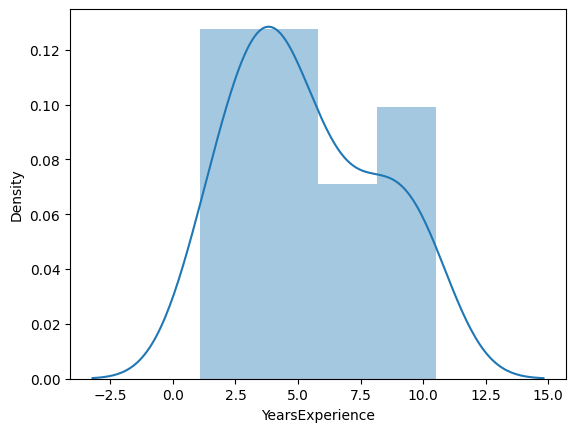

In [183]:
sns.distplot(salary_data["YearsExperience"])

<Axes: >

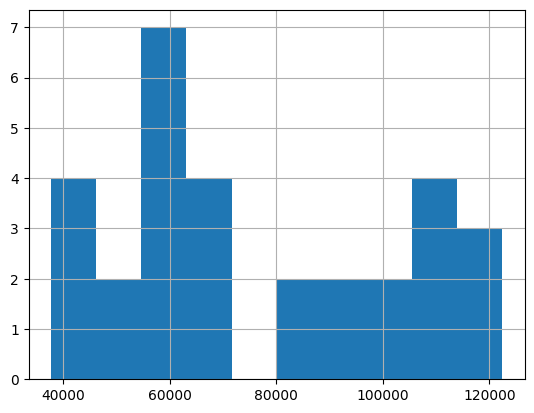

In [184]:
salary_data["Salary"].hist()

<Axes: >

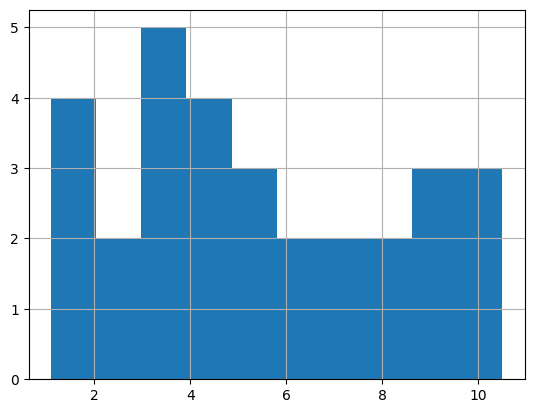

In [185]:
salary_data["YearsExperience"].hist()

C:\Users\91863\AppData\Local\Temp\ipykernel_3360\860547009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  square_root["Salary"] = np.sqrt(square_root.Salary)


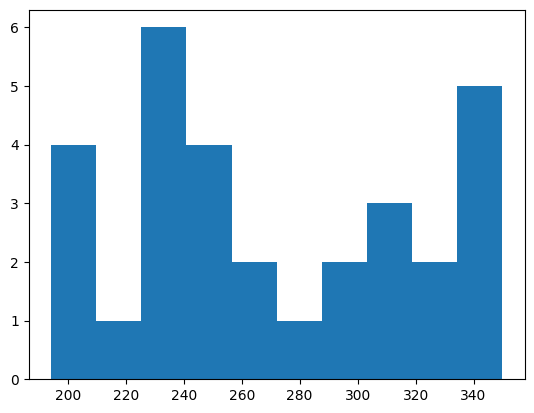

In [186]:
#  square root tranformations


from math import sqrt
square_root= pd.DataFrame()
square_root = salary_data[['Salary']]
square_root["Salary"] = np.sqrt(square_root.Salary)


# Histogram

plt.hist(square_root["Salary"])
plt.show()

C:\Users\91863\AppData\Local\Temp\ipykernel_3360\3730851738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log['Salary'] = np.log(log.Salary)


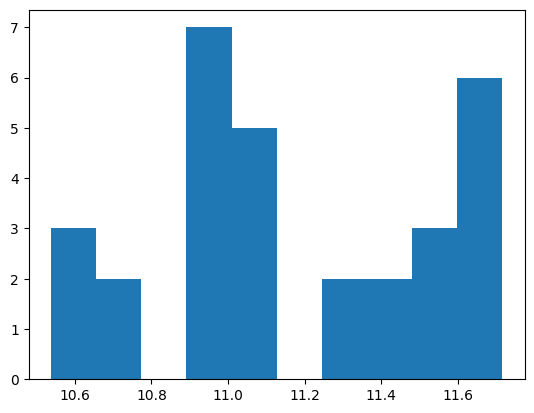

In [187]:
# log transform

log = pd.DataFrame()
log = salary_data[['Salary']]
log['Salary'] = np.log(log.Salary)



# Histogram
plt.hist(log['Salary'])
plt.show()

model fitting


In [188]:
sal_hike_model = smf.ols("Salary~YearsExperience",data=salary_data).fit()
sal_hike_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        22:29:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
sal_hike_model.params   ## Bo= 25792.20    B1 = 9449.96

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [190]:
sal_hike_model.tvalues,sal_hike_model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [191]:
sal_hike_model.rsquared

0.9569566641435086

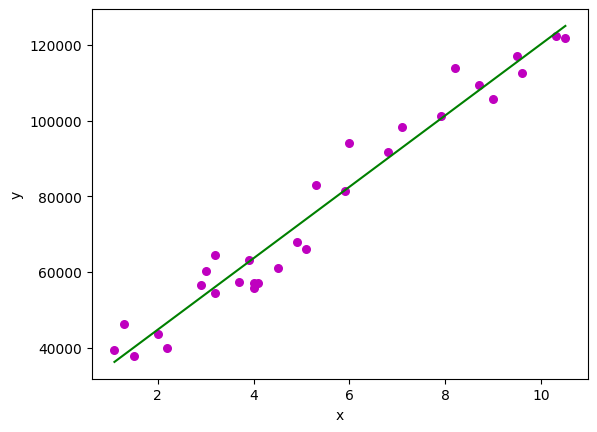

In [192]:
x=salary_data["YearsExperience"].values
y=salary_data["Salary"].values
plt.scatter(x,y,color="m",marker="o",s=30)
b0=  25792.20
b1=  9449.96
# predicted response vector
y_hat=b0+b1*x
#plotting the regression line
plt.plot(x,y_hat,color="g")
#putting labels
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [193]:
salary_data["salary_predicted"] = y_hat
salary_data

,YearsExperience,Salary,salary_predicted
0,1.1,39343.0,36187.156
1,1.3,46205.0,38077.148
2,1.5,37731.0,39967.140
3,2.0,43525.0,44692.120
4,2.2,39891.0,46582.112
5,2.9,56642.0,53197.084
6,3.0,60150.0,54142.080
7,3.2,54445.0,56032.072
8,3.2,64445.0,56032.072
9,3.7,57189.0,60757.052


In [194]:
mse = mean_squared_error(salary_data["Salary"],y_hat)
mse

31270951.722479995

In [195]:
mean_absolute_percentage_error(salary_data["Salary"],y_hat)

0.07048032335741067

In [196]:
import math
rmse =math.sqrt(mse)
rmse

5592.043608778457